## Convolutional Neural Networks & Residual Neural Network

In this section, we will again work with the `fashion_mnist` dataset. Unlike the previous task, you are tasked with creating a convolutional neural network that uses `VGG16` as the convolutional base. Train the resulting network on the **fashion_mnist** dataset. Try to achieve the highest possible classification accuracy by manipulating the network's parameters. During training, use fine-tuning and feature extraction techniques. Compare the accuracy of the resulting convolutional network with that of a multilayer perceptron. Provide conclusions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras import optimizers, losses
from sklearn.metrics import classification_report
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
# As the convolutional base, we will use the VGG16 network, which was trained on ImageNet data
# Import the model to create the convolutional base using VGG16
conv_vgg16_base = VGG16(include_top=False, input_shape=(32, 32, 3))

In [5]:
# Extend the model by adding custom fully connected layers
# To ensure the model trains properly on this dataset
conv_vgg16_base.trainable = False

model = Sequential([
   conv_vgg16_base,

   Flatten(),
   Dense(512, activation='relu'),
   Dropout(0.1),
   Dense(10, activation="softmax"),
])

In [6]:
# After adding the top layers, we compile the model by specifying the optimizer, loss function, and metrics
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [7]:
# Let's display the model architecture description
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
_________________________________________________________________


As we can see, we have 14,714,688 non-trainable parameters, which we disabled by adding the line `conv_vgg16_base.trainable = False`.

In [8]:
# Prepare the data
# Load the dataset and take a look at its contents
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [9]:
# We save the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

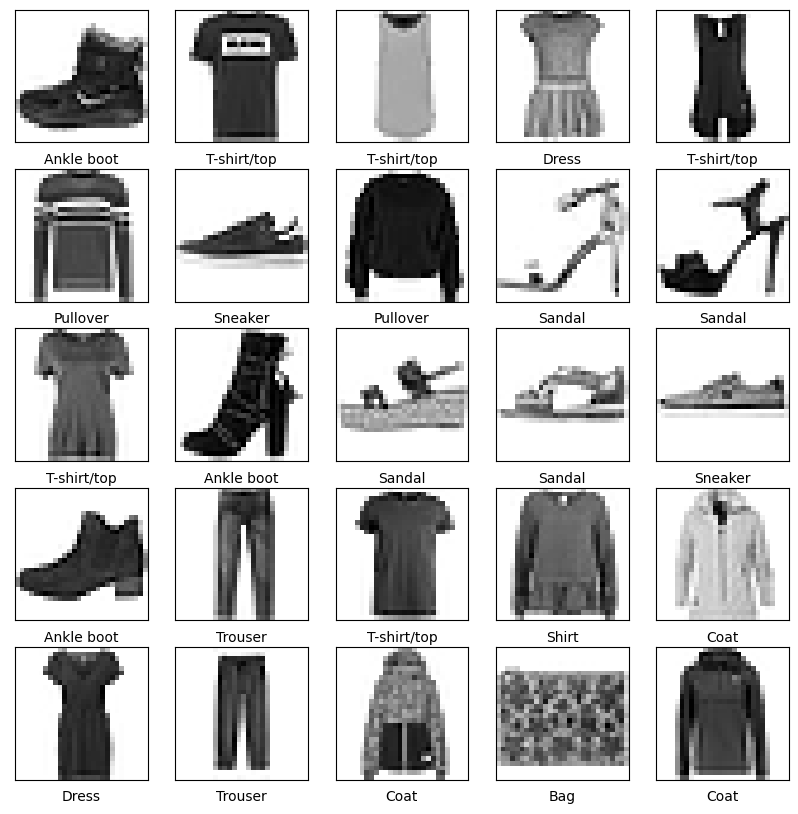

In [10]:
# Let's display the first 25 images from the training set to ensure the data is in the correct format
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

At this stage, we need to work with the data and prepare it for training.

This pre-trained convolutional VGG16 model is designed to accept images in the 150x150 or 224x224 pixel format. However, due to memory resource limitations, we cannot resize the images to 150x150. The minimum format that our VGG16 model accepts is 32x32x3. Therefore, we will resize our images from 28x28x1 to 32x32x3, as we specified the input format parameter when importing this model. We also need to convert the images from a single color channel (grayscale) to three color channels (RGB):

In [11]:
train_images_rgb = np.repeat(x_train[..., np.newaxis], 3, axis=3)
test_images_rgb = np.repeat(x_test[..., np.newaxis], 3, axis=3)

In [12]:
train_images = np.array([np.resize(img, (32, 32, 3)) for img in train_images_rgb])
test_images = np.array([np.resize(img, (32, 32, 3)) for img in test_images_rgb])

In [13]:
# We normalize the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [14]:
# Training the model on the training dataset
history = model.fit(train_images, y_train, epochs=40, batch_size=128, validation_split=0.2)

Epoch 1/40
375/375 [==============================] - 232s 618ms/step - loss: 1.3185 - accuracy: 0.5585 - val_loss: 0.9840 - val_accuracy: 0.6745
Epoch 2/40
375/375 [==============================] - 236s 630ms/step - loss: 0.9120 - accuracy: 0.6921 - val_loss: 0.8463 - val_accuracy: 0.7032
Epoch 3/40
375/375 [==============================] - 237s 632ms/step - loss: 0.8183 - accuracy: 0.7196 - val_loss: 0.7788 - val_accuracy: 0.7309
Epoch 4/40
375/375 [==============================] - 238s 636ms/step - loss: 0.7647 - accuracy: 0.7360 - val_loss: 0.7383 - val_accuracy: 0.7397
Epoch 5/40
375/375 [==============================] - 236s 629ms/step - loss: 0.7296 - accuracy: 0.7456 - val_loss: 0.7084 - val_accuracy: 0.7496
Epoch 6/40
375/375 [==============================] - 241s 643ms/step - loss: 0.7033 - accuracy: 0.7525 - val_loss: 0.6863 - val_accuracy: 0.7567
Epoch 7/40
375/375 [==============================] - 237s 632ms/step - loss: 0.6811 - accuracy: 0.7596 - val_loss: 0.6699 -

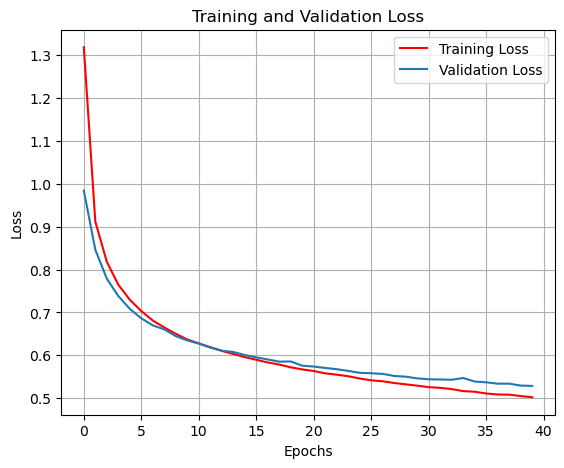

In [15]:
# Visualization of the obtained data
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()

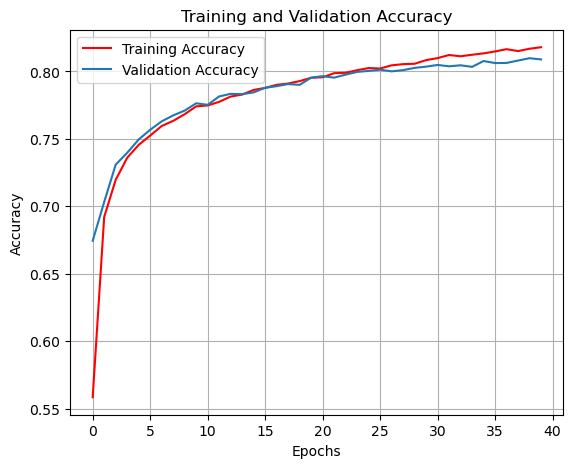

In [16]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

Thus, 82% training accuracy and 81% validation accuracy are fairly good results, but not the best. It might be necessary to increase the number of epochs.

Additionally, the model can be improved by applying data augmentation to the training data, as augmentation creates a more diverse training set.

In [17]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator()

In [18]:
# We use the `.flow()` method to create generators
train_generator = train_datagen.flow(
        train_images,
        y_train,
        batch_size=128)

validation_generator = test_datagen.flow(
        test_images,
        y_test,
        batch_size=128)

In [19]:
# Training the model using the generators defined above
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 256,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(test_images) // 256
)

Epoch 1/50
234/234 [==============================] - 138s 586ms/step - loss: 0.9314 - accuracy: 0.6687 - val_loss: 0.7498 - val_accuracy: 0.7376
Epoch 2/50
234/234 [==============================] - 143s 610ms/step - loss: 0.8041 - accuracy: 0.7094 - val_loss: 0.7487 - val_accuracy: 0.7396
Epoch 3/50
234/234 [==============================] - 147s 630ms/step - loss: 0.7946 - accuracy: 0.7142 - val_loss: 0.7568 - val_accuracy: 0.7380
Epoch 4/50
234/234 [==============================] - 143s 610ms/step - loss: 0.7702 - accuracy: 0.7201 - val_loss: 0.7211 - val_accuracy: 0.7520
Epoch 5/50
234/234 [==============================] - 146s 623ms/step - loss: 0.7583 - accuracy: 0.7228 - val_loss: 0.7511 - val_accuracy: 0.7400
Epoch 6/50
234/234 [==============================] - 143s 611ms/step - loss: 0.7526 - accuracy: 0.7260 - val_loss: 0.7484 - val_accuracy: 0.7460
Epoch 7/50
234/234 [==============================] - 143s 612ms/step - loss: 0.7397 - accuracy: 0.7320 - val_loss: 0.7305 -

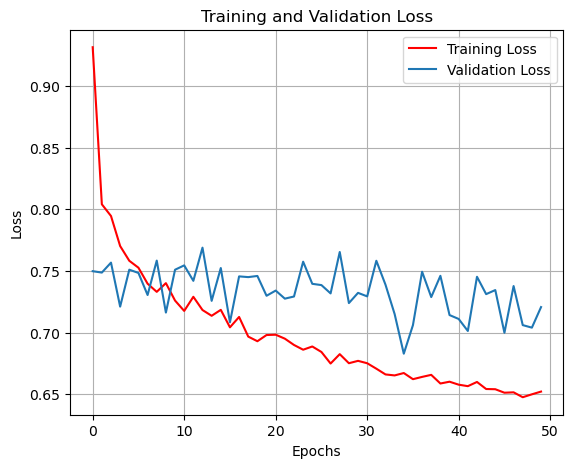

In [20]:
# Visualization of the obtained data
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()

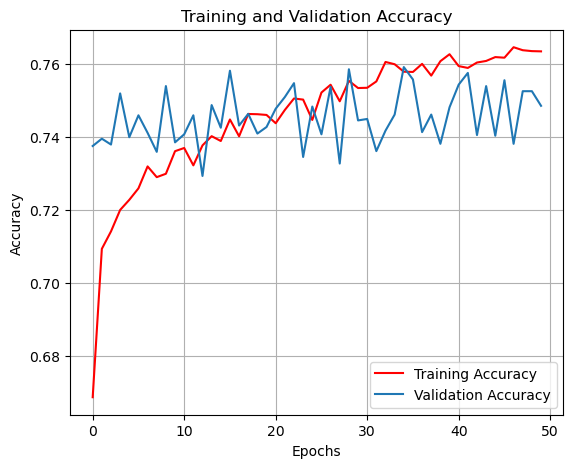

In [21]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

It can be concluded that the model has overfitted. The accuracy on the training dataset has decreased to 76%. Therefore, data augmentation did not help improve this model.

Let's try fine-tuning the model by unfreezing part of the convolutional base, specifically the last 4 convolutional layers of the VGG16 model.

In [22]:
conv_vgg16_base = VGG16(include_top=False, input_shape=(32, 32, 3))

In [23]:
for layer in conv_vgg16_base.layers[:-4]:
    layer.trainable = False
for layer in conv_vgg16_base.layers[-4:]:
    layer.trainable = True

In [24]:
model = Sequential([
   conv_vgg16_base,

   Flatten(),
   Dense(512, activation='relu'),
   Dropout(0.2),
   Dense(10, activation="softmax"),
])

In [25]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 7,347,210
Non-trainable params: 7,635,264
_________________________________________________________________


In [27]:
history = model.fit(train_images, y_train, epochs=40, batch_size=128, validation_split=0.2)

Epoch 1/40
375/375 [==============================] - 681s 2s/step - loss: 1.0842 - accuracy: 0.6246 - val_loss: 0.6726 - val_accuracy: 0.7634
Epoch 2/40
375/375 [==============================] - 681s 2s/step - loss: 0.6416 - accuracy: 0.7728 - val_loss: 0.5603 - val_accuracy: 0.8002
Epoch 3/40
375/375 [==============================] - 684s 2s/step - loss: 0.5636 - accuracy: 0.7970 - val_loss: 0.5199 - val_accuracy: 0.8128
Epoch 4/40
375/375 [==============================] - 686s 2s/step - loss: 0.5181 - accuracy: 0.8123 - val_loss: 0.5034 - val_accuracy: 0.8159
Epoch 5/40
375/375 [==============================] - 681s 2s/step - loss: 0.4843 - accuracy: 0.8249 - val_loss: 0.4670 - val_accuracy: 0.8302
Epoch 6/40
375/375 [==============================] - 682s 2s/step - loss: 0.4670 - accuracy: 0.8308 - val_loss: 0.4543 - val_accuracy: 0.8353
Epoch 7/40
375/375 [==============================] - 690s 2s/step - loss: 0.4465 - accuracy: 0.8376 - val_loss: 0.4355 - val_accuracy: 0.8416

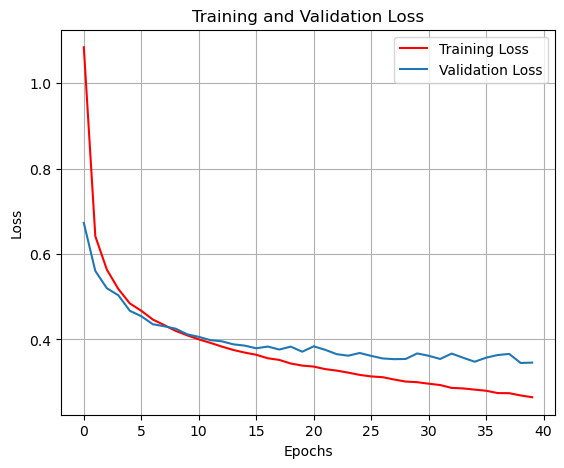

In [28]:
# Visualization of the obtained data
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()

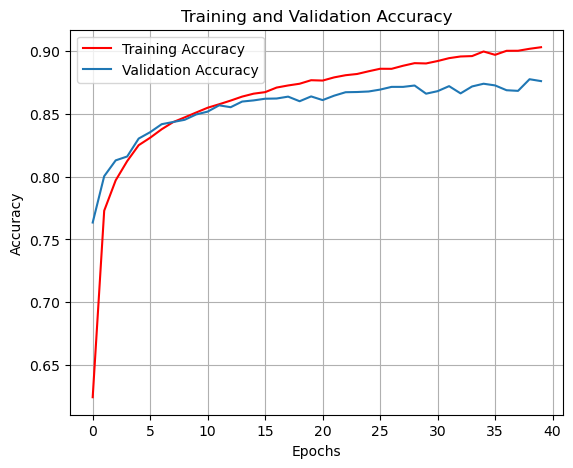

In [29]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

As we can see, during fine-tuning, the network achieved better results, specifically 90% accuracy. Therefore, we can conclude that fine-tuning proved to be the best option for working with the fashion_mnist dataset using the VGG16 convolutional neural network.

Before evaluating the model on the test dataset, we will resize the images to 32x32x3.

In [30]:
x_test_resized = np.array([np.resize(img, (32, 32)) for img in x_test])
x_test_rgb = np.repeat(x_test_resized[..., np.newaxis], 3, axis=-1)

In [31]:
# Normalize the data
x_test_rgb = x_test_rgb.astype('float32') / 255.

In [32]:
# Model evaluation on the test dataset
test_loss, test_accuracy = model.evaluate(x_test_rgb, y_test, verbose=2)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 - 39s - loss: 0.3561 - accuracy: 0.8743 - 39s/epoch - 124ms/step
Test loss: 0.35608237981796265
Test accuracy: 0.8743000030517578


# Conclusions:  
A pre-trained VGG16 model was used. After loading this convolutional neural network, Flatten and 2 Dense layers were added. The accuracy achieved was 81%. Next, after applying data augmentation, the result worsened to 76% and overfitting was observed on the validation data.  

Then fine-tuning was implemented by unfreezing the last 4 convolutional layers of VGG16, achieving an accuracy of 90%. After evaluating the model on the test dataset, the accuracy obtained was 87% with a test loss of 0.35.